# Data Pre-processing and Exploratory Data Analysis (EDA)


Before you train your models, you need to develop a sound understanding of the data. Real-world data sets are often noisy, are missing values, or have a host of other discrepancies. You can use data summarization and visualization to audit the quality of your data and provide the information you need to process the data before it's ready for modeling. This process is often iterative. 

Let us explore and understand the data first.
- Check for missing/Null values
- Check for duplicates
- Check for outliers and any other inconsistencies in the data



### First install the required libraries

ydata-profiling provides a one-line Exploratory Data Analysis (EDA) experience in a consistent and fast solution.

In [1]:
%pip install ydata-profiling

StatementMeta(, 407af2ac-e5bf-4b54-8b32-a0ff244429a5, 7, Finished, Available, Finished)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.2/65.2 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 140.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 443.6/443.6 kB 124.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 179.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 111.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 18.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=4839302b05b8eabc3f287a91eb3d15f5bc3a14e796b9fbb386eb366796e66312


In [2]:
churn_raw_df = spark.read.format("delta").load("Tables/churn_raw").cache().toPandas()

StatementMeta(, 407af2ac-e5bf-4b54-8b32-a0ff244429a5, 9, Finished, Available, Finished)

In [3]:
#Get overview of the data
def data_overiew(churn_raw_df, message):
    print(f"{message}:\n")
    print('Number of rows: ', churn_raw_df.shape[0])
    print("\nNumber of features:", churn_raw_df.shape[1])
    print("\nData Features:")
    print(churn_raw_df.dtypes)
    print("\nMissing values:")
    print(churn_raw_df.isna().sum())
    print("\nUnique values:")
    print(churn_raw_df.nunique())

data_overiew(churn_raw_df, 'Overview of the dataset')

StatementMeta(, 407af2ac-e5bf-4b54-8b32-a0ff244429a5, 10, Finished, Available, Finished)

Overview of the dataset:

Number of rows:  10000

Number of features: 14

Data Features:
RowNumber            int32
CustomerId           int32
Surname             object
CreditScore          int32
Geography           object
Gender              object
Age                  int32
Tenure               int32
Balance            float64
NumOfProducts        int32
HasCrCard            int32
IsActiveMember       int32
EstimatedSalary    float64
Exited               int32
dtype: object

Missing values:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Unique values:
RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenu

#### Observations:
- No missing values
- No duplicates on business keys

### Data Cleansing

You may use Data Wrangler to perform initial data cleansing (see the lab guide for details)

Alternatively, use below function to clean up data

In [4]:
def clean_data(df):
    # Drop rows with missing data across all columns
    df.dropna(inplace=True)
    # Drop duplicate rows in columns: 'RowNumber', 'CustomerId'
    df.drop_duplicates(subset=['RowNumber', 'CustomerId'], inplace=True)
    # Drop columns: 'RowNumber', 'CustomerId', 'Surname' as these will not help in modeling
    df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)
    return df

churn_clean_df = clean_data(churn_raw_df.copy())

StatementMeta(, 407af2ac-e5bf-4b54-8b32-a0ff244429a5, 11, Finished, Available, Finished)

In [5]:
data_overiew(churn_clean_df, 'Overview of the cleansed dataset')

StatementMeta(, 407af2ac-e5bf-4b54-8b32-a0ff244429a5, 12, Finished, Available, Finished)

Overview of the cleansed dataset:

Number of rows:  10000

Number of features: 11

Data Features:
CreditScore          int32
Geography           object
Gender              object
Age                  int32
Tenure               int32
Balance            float64
NumOfProducts        int32
HasCrCard            int32
IsActiveMember       int32
EstimatedSalary    float64
Exited               int32
dtype: object

Missing values:
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Unique values:
CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64


#### EDA
In this notebook, we will use ydata-profiling library which provides a one-line Exploratory Data Analysis (EDA) experience in a consistent and fast solution. You may choose any other method too for exploratory data analysis

Alternatively, you may also use Data Wrangler to explore and prepare data (for more details check: https://learn.microsoft.com/en-us/fabric/data-science/data-wrangler)

In [6]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

profile = ProfileReport(churn_clean_df, title="Profiling Report", minimal=True)

StatementMeta(, 407af2ac-e5bf-4b54-8b32-a0ff244429a5, 13, Finished, Available, Finished)

Let us review the profile results.

[Tips: Look for missing values in variables, cardinality, imbalanced class for dependent variable, outliers, correlations among the variables, and so on]

In [7]:
profile

StatementMeta(, 407af2ac-e5bf-4b54-8b32-a0ff244429a5, 14, Finished, Available, Finished)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 11/11 [00:00<00:00, 60.90it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

StatementMeta(, 407af2ac-e5bf-4b54-8b32-a0ff244429a5, 15, Finished, Available, Finished)

StatementMeta(, 407af2ac-e5bf-4b54-8b32-a0ff244429a5, 16, Finished, Available, Finished)

Alternatively, you may explore raw data with display and visualize using seaborn and matplotlib

In [8]:
import seaborn as sns
sns.set_theme(style="whitegrid", palette="tab10", rc = {'figure.figsize':(9,6)})
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import rc, rcParams
import numpy as np
import pandas as pd
import itertools

display(churn_clean_df, summary=True)

StatementMeta(, 407af2ac-e5bf-4b54-8b32-a0ff244429a5, 17, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 75eb2619-7ea1-474f-acb8-237a1aa5aee1)

#### Verify the class imbalance

StatementMeta(, 407af2ac-e5bf-4b54-8b32-a0ff244429a5, 26, Finished, Available, Finished)

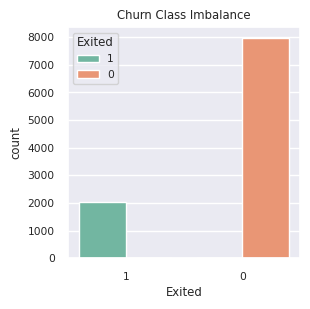

Exited
0    79.6%
1    20.4%
Name: proportion, dtype: object

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

churn_clean_df["Exited"] = churn_clean_df["Exited"].astype(str)

sns.set_style("darkgrid")
plt.figure(figsize=(3,3))
sns.countplot(x=churn_clean_df["Exited"], data=churn_clean_df, palette='Set2', hue='Exited')
plt.title('Churn Class Imbalance')
plt.show()
churn_clean_df.Exited.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

 

Note: Clearly, this is a case of imbalanced class - there are considerably low percentage of minority class data (Customers who Exited)

#### Determine categorical, numerical, and target attributes

Since Tenure happens to have 11 unique values (in the sample data used, see churn_raw_df.nunique()), using that as threshold to determine categorical values

In [21]:
churn_clean_df["Exited"] = churn_clean_df["Exited"].astype(int)

all_cols = churn_clean_df.columns
num_cols = churn_clean_df._get_numeric_data().columns

# Determine the dependent (target) attribute
dependent_variable = "Exited"
print("Dependent variable: ", dependent_variable)

numeric_variables = [col for col in all_cols 
                            if col in num_cols and churn_clean_df[col].nunique() >11]
print("Numeric variables: ", numeric_variables)

categorical_variables = [col for col in all_cols 
                            if (col not in num_cols and churn_clean_df[col].nunique() <=11) 
                            or (churn_clean_df[col].nunique() <=11 and col not in dependent_variable)]

print("Categorical variables: ", categorical_variables)

StatementMeta(, 407af2ac-e5bf-4b54-8b32-a0ff244429a5, 30, Finished, Available, Finished)

Dependent variable:  Exited
Numeric variables:  ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
Categorical variables:  ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']


#### Verify the five-number summary 

The statistical quantities are:
- Median: middle value sample or 50th percentile or 2nd quartile
- 1st Quartile: The 25th percentile
- 3rd Quartile: The 75th percentile
- Minimum: Smallest observation in the sample
- Maximum: Largest observation in the sample

StatementMeta(, 407af2ac-e5bf-4b54-8b32-a0ff244429a5, 34, Finished, Available, Finished)

/tmp/ipykernel_9939/3667223209.py:4: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


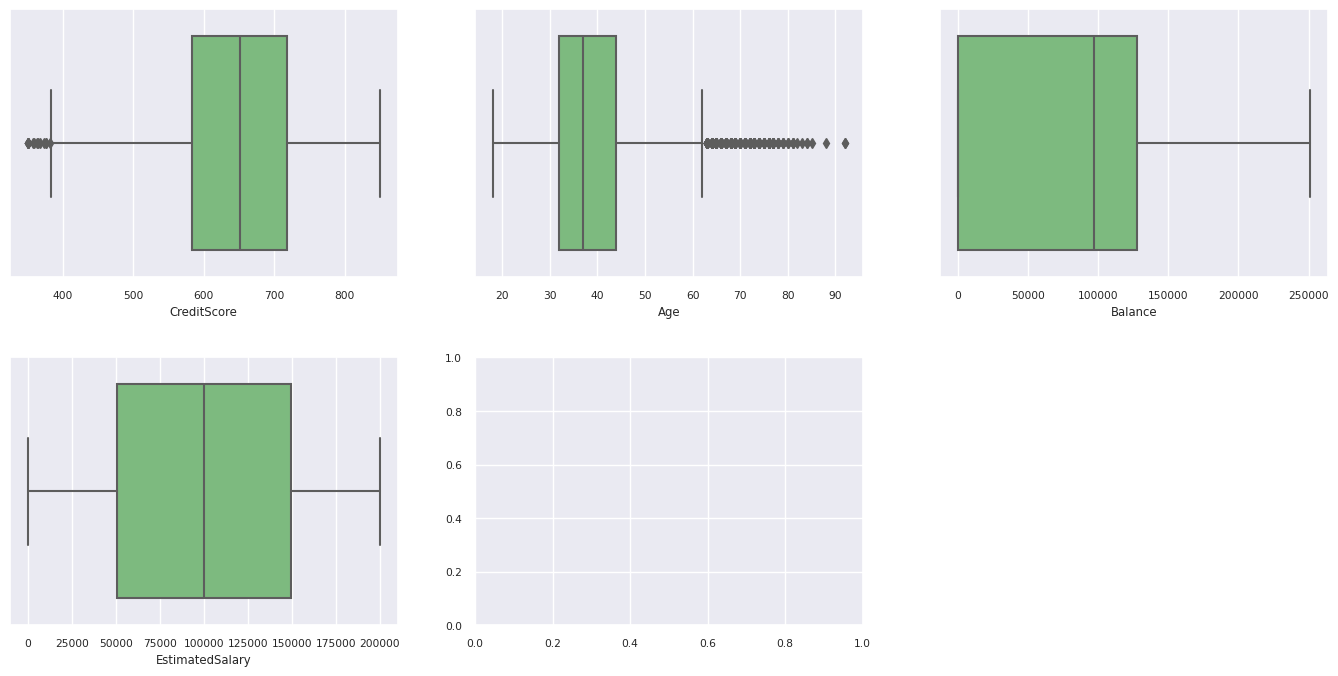

In [25]:
 
df_num_cols = churn_clean_df[numeric_variables]
sns.set(font_scale = 0.7) 
fig, axes = plt.subplots(nrows = 2, ncols = 3, gridspec_kw =  dict(hspace=0.3), figsize = (17,8))
fig.tight_layout()
for ax,col in zip(axes.flatten(), df_num_cols.columns):
    sns.boxplot(x = df_num_cols[col], palette="Greens", ax = ax)
fig.delaxes(axes[1,2])

#### Distribution of exited and non-exited customers across categorical variables

StatementMeta(, 407af2ac-e5bf-4b54-8b32-a0ff244429a5, 36, Finished, Available, Finished)

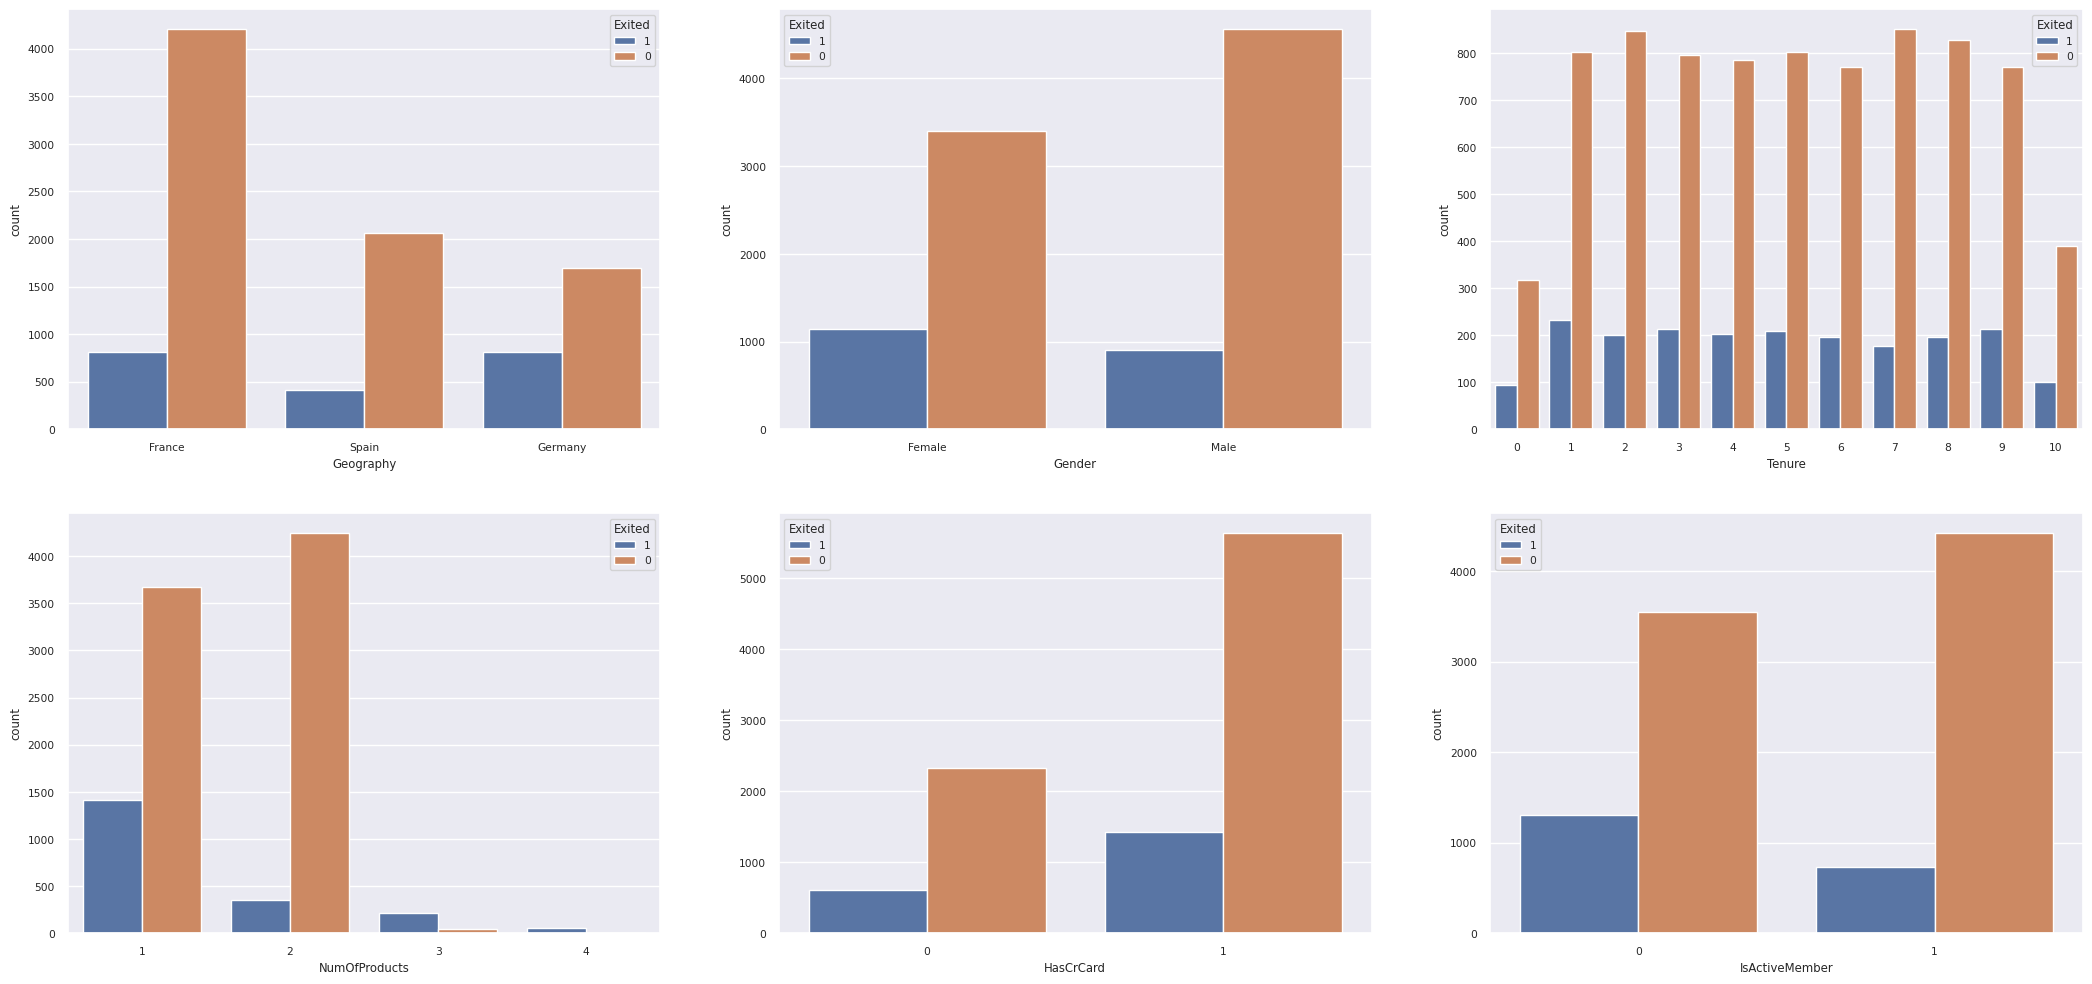

In [27]:
churn_clean_df["Exited"] = churn_clean_df["Exited"].astype(str)

fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(26,12))
for col,subplot in zip(categorical_variables, ax.flatten()):
    sns.countplot(x = churn_clean_df[col], hue=churn_clean_df.Exited, ax=subplot)

#### Distribution of numerical attributes

StatementMeta(, 407af2ac-e5bf-4b54-8b32-a0ff244429a5, 37, Finished, Available, Finished)

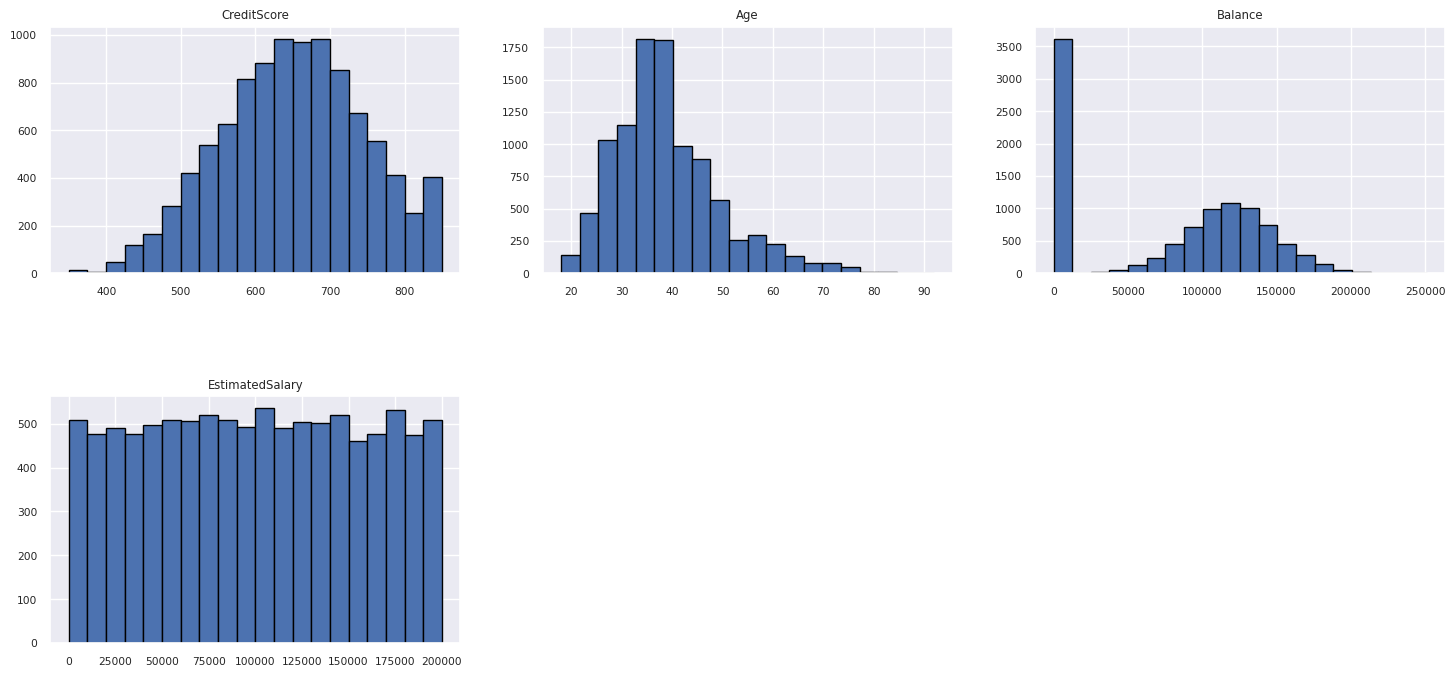

In [28]:
columns = df_num_cols.columns[: len(df_num_cols.columns)]
fig = plt.figure()
fig.set_size_inches(18, 8)
length = len(columns)
for i,j in itertools.zip_longest(columns, range(length)):
    plt.subplot((length // 2), 3, j+1)
    plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
    df_num_cols[i].hist(bins = 20, edgecolor = 'black')
    plt.title(i)

plt.show()

### Correlation

StatementMeta(, 407af2ac-e5bf-4b54-8b32-a0ff244429a5, 38, Finished, Available, Finished)

<Axes: >

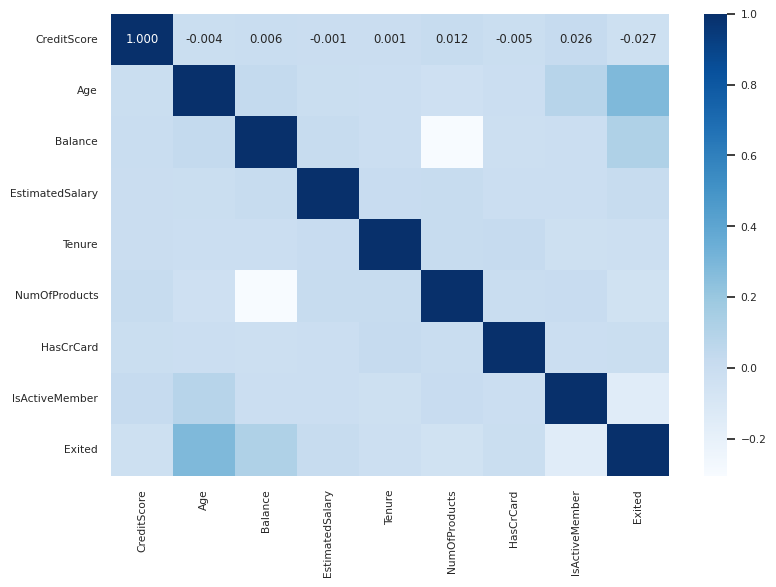

In [29]:
cols_corr = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts', 
                'HasCrCard', 'IsActiveMember', 'Exited'] 
sns.heatmap(data = churn_clean_df[cols_corr].corr(),annot=True,fmt='.3f', cmap="Blues")


### Saving the clean data to churn_prep for further processing 

This will be used in next notebook

In [30]:
# spark.conf.set("sprk.sql.parquet.vorder.enabled", "true") # VOrder write is enabled by default
# spark.conf.set("spark.microsoft.delta.optimizeWrite.enabled", "true") # automatic delta optimized write is enabled by default

churn_clean_df["Exited"] = churn_clean_df["Exited"].astype(int)


spark_df = spark.createDataFrame(churn_clean_df)

table_name = "churn_prep"
spark_df.write.mode("overwrite").format("delta").save(f"Tables/{table_name}")
print(f"Spark dataframe saved to delta table: {table_name}")

StatementMeta(, 407af2ac-e5bf-4b54-8b32-a0ff244429a5, 39, Finished, Available, Finished)

Spark dataframe saved to delta table: churn_prep


## **Summary of observations from the exploratory data analysis**
- These are the features:
    - Dependent variable (prediction feature):  Exited
    - Numeric variables:  ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
    - Categorical variables:  ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
- Imbalanced class (for Exited customer)
- Most of the customers are from France comparing to Spain and Germany, while Spain has the lower churn rate comparing to France and Germany.
- Most of the customers have credit cards.
- There are customers whose age and credit score are above 60 and below 400, respectively, but they can't be considered as outliers.
- Very few customers have more than two of the bank's products.
- Customers who aren't active have a higher churn rate.
- Gender and Tenure years don't seem to have an impact on customer's decision to close the bank account.
- Age (positive), IsActiveMember (negative) seems to have slight correlation with the target variable (Exited)

_Did you find any other interesting observations?_
